# Integração Numérica


## 9.1 Somas de Riemann



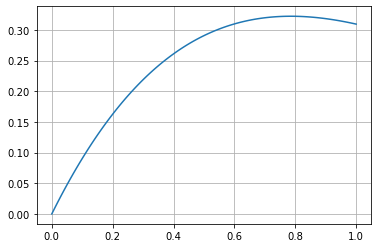

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

sp.init_printing()

x = sp.Symbol('x')
x_ = np.linspace(0, 1, 100)
y_ = np.sin(x_) * np.exp(-x_)

plt.plot(x_, y_)
plt.grid()
plt.show()

## 9.2 Regras de Newton-Cotes


In [2]:
def lagrangian_polynomial(x0, y0, x):
    n = len(x0)

    L = [1 for _ in range(n)]
    for k in range(n):
        for j in range(n):
            if (k != j):
                L[k] *= (x - x0[j])/(x0[k] - x0[j])
    p = 0
    for k in range(n):
        p += L[k] * y0[k]
    p = sp.simplify(p)
    return p

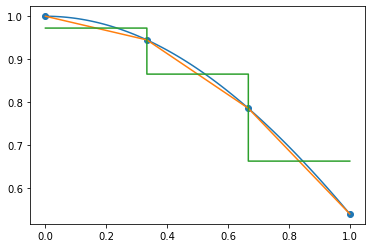

In [3]:
f = sp.cos(x)
x_axis = np.linspace(0, 1, 4)
y_axis = [f.subs(x, x0) for x0 in x_axis]
p = lagrangian_polynomial(x_axis, y_axis, x)
h = x_axis[1] - x_axis[0]

x_axis_3 = np.linspace(0, 1, 100)
y_axis_3 = [f.subs(x, x0) for x0 in x_axis_3]

x_axis_2 = x_axis + h - 0.000001
x_axis_2 = list(x_axis_2) + list(x_axis)
x_axis_2.sort()

# ponto medio
A = [(p.subs(x, x_axis[i]) + p.subs(x, x_axis[i+1]))/2 for i in range(len(x_axis) - 1)]
A += [np.nan]
A = list(A)
A2= []
for i in range(len(A)):
    A2.append(A[i]) 
    A2.append(A[i]) 

plt.plot(x_axis_3, y_axis_3)
plt.plot(x_axis, y_axis)
plt.scatter(x_axis, y_axis)
plt.plot(x_axis_2, A2)

In [4]:
def trapezio(x, y):
    s = 0
    n = len(x)
    for i in range(n-1):
        s += (x[i+1]-x[i])/2 * (y[i] + y[i+1])
    return s

In [6]:
x_axis = np.linspace(-2, 2, 100)
y_axis = np.exp(-x_axis**2/2) / (2*np.sqrt(np.pi))

s = 0
n = len(x_axis)
h = x_axis[1] - x_axis[0]
s += y_axis[0]
s += y_axis[n-1]
for i in range(1, n-1):
    s += 2*y_axis[i]
s *= h / 2
s



## Regra de Simpson

In [6]:
#(x[2]-x[0])/6 * (y[0] + 4*y[1] + y[2])

In [81]:
x = np.array([0, 0.2, 0.4, 0.6])
y = np.array([-1, -0.5, 1.3, 2])
n = len(x)


def simpson_integrate(x, y):
    s = 0
    n = len(x)
    n1 = n-(n%2)

    for i in range(2,n,2):
        s += (x[i]-x[i-2])/6 * (y[i-2] + 4*y[i-1] + y[i])
    
    if (n%2 == 0):
        s += (x[n-1]-x[n-2])/2 * (y[n-2] + y[n-1])
    
    return s


In [8]:
x = np.array([0, 0.5, 1])
y = np.exp(-x**2)

simpson_integrate(x, y)

In [9]:
x = np.array([0, 0.5, 1])
y = np.exp(-x)
simpson_integrate(x, y)

In [10]:
x = np.array([0, 0.5, 1])
y = x**2
simpson_integrate(x, y)

In [11]:
x = np.array([0, 0.5, 1])
y = x**3
simpson_integrate(x, y)

In [12]:
x = np.array([0, 0.5, 1])
y = x * np.exp(-x**2)
simpson_integrate(x, y)

In [82]:
for i in range(3, 10, 1):
    x = np.linspace(0, 1, i)
    y = 1/(x**2+0.1)
    print(f'n = {i}')
    print(simpson_integrate(x, y))
    


n = 3
3.7229437229437234
n = 4
3.8780935021536522
n = 5
3.9397080906514863
n = 6
3.980093545310936
n = 7
3.9902293776108753
n = 8
3.9969152339263334
n = 9
3.997571372656896


In [84]:

x = sp.Symbol('x')
f = 1/(x**2+0.1)
f = f.diff(x)
f.subs(x, 1) - f.subs(x, 0)

In [85]:
x = np.array([0, 0.5, 1])
y = x/(x**2+1)
simpson_integrate(x, y)

In [86]:
n = 3
a = 2
b = 5
for n in range(3, 11, 2):
    x = np.linspace(a, b, n)
    y = np.exp(4-x**2)
    print(f'n = {n}: {simpson_integrate(x, y)}')
print()
for n in range(3, 11, 2):
    x = np.linspace(a, b, n)
    y = np.exp(4-x**2)
    print(f'n = {n}: {simpson_integrate(x, y)}')

n = 3: 0.5005225174937314
n = 5: 0.27849922706686875
n = 7: 0.23935507770462106
n = 9: 0.2306618390209549

n = 3: 0.5005225174937314
n = 5: 0.27849922706686875
n = 7: 0.23935507770462106
n = 9: 0.2306618390209549


## Quadratura de Gauss-Legendre

In [87]:
x = sp.Symbol('x')
f = sp.exp(x)
a = -1
b = 1
float(sp.integrate(f).subs(x, b) - sp.integrate(f).subs(x, a))

f.subs(x, (b-1) - 1/np.sqrt(3)) + f.subs(x, (b-1) + 1/np.sqrt(3))